## Exploratory Data Analytics

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
dataset = pd.read_csv("/Users/anand/Desktop/EDA-Practice/Data/zomato.csv" , encoding='latin 1')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
# need to find the col and the row of the data 
dataset.shape

(9551, 21)

In [74]:
cols = dataset.columns
print(cols)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [75]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [76]:
# checking the missing values in the dataset
[features for features in dataset.columns if dataset[features].isnull().sum() > 1]

['Cuisines']

In [78]:
dataset.duplicated().sum()>0

False

In [9]:
dataset_country = pd.read_excel("/Users/anand/Desktop/EDA-Practice/Data/Country-Code.xlsx")
dataset_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
# need to merge the file with the existing one so we need to use how to merge the file so we need the how like the left join , right join
dataset_final = pd.merge(dataset , dataset_country , on="Country Code" , how='left') 
dataset_final.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [75]:
Country_Name = dataset_final['Country'].value_counts().index.tolist()
print(Country_Name)

['India', 'United States', 'United Kingdom', 'Brazil', 'UAE', 'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada']


In [74]:
Country_Count = dataset_final['Country'].value_counts().values.tolist()
print(Country_Count)

[8652, 434, 80, 60, 60, 60, 40, 34, 24, 22, 21, 20, 20, 20, 4]


In [73]:
Country_data = pd.DataFrame({'Country' : Country_Name , 'Count' : Country_Count})

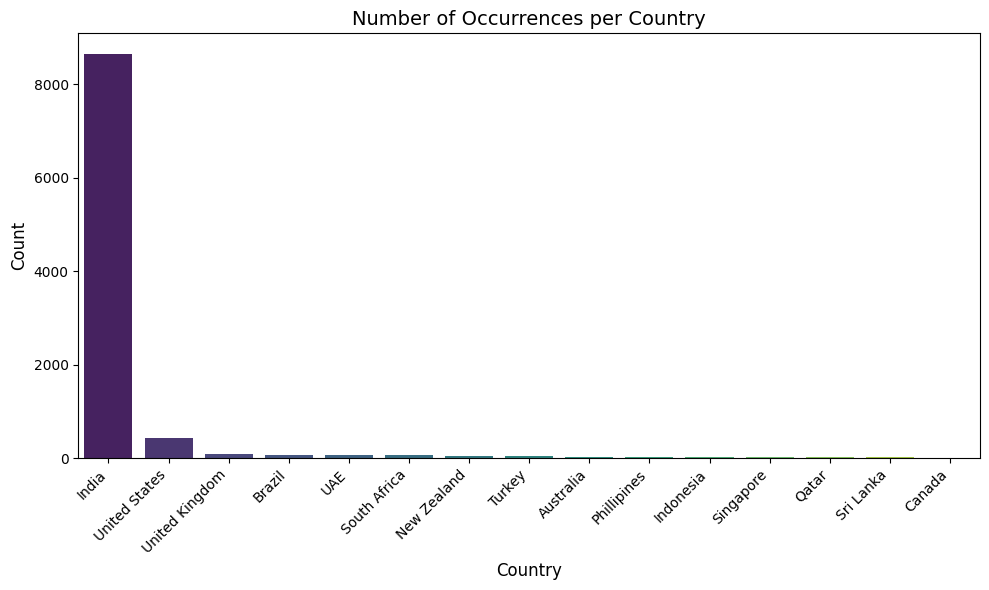

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x = "Country" , y = "Count" , data= Country_data ,palette='viridis')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Occurrences per Country', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
dataset_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [62]:
ratings = dataset_final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns = { 0 : 'Rating Count'})

In [64]:
ratings.head(2)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1


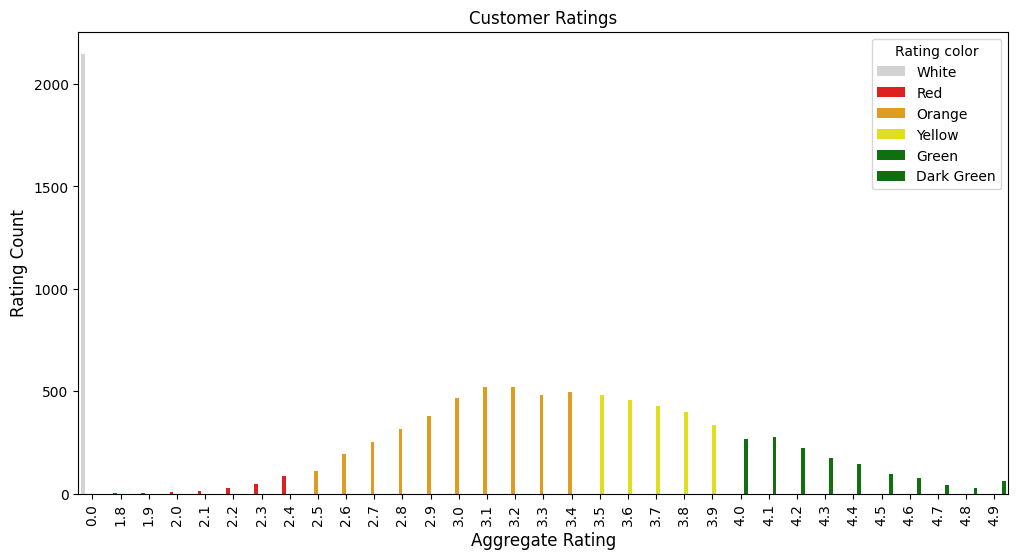

In [102]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12 ,6)
sns.barplot(x = "Aggregate rating" , y = "Rating Count" ,hue= 'Rating color', data=ratings , palette=['lightgrey' , 'red' , 'orange' , 'yellow' , 'green' , 'green']) 
plt.title("Customer Ratings" , fontsize = 12)
plt.xlabel("Aggregate Rating" , fontsize = 12)
plt.ylabel("Rating Count" , fontsize = 12)
plt.xticks(rotation = 90)
plt.show()


In [105]:
dataset_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [106]:
dataset_final[['Has Online delivery' , 'Country']].groupby(['Has Online delivery' , 'Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [107]:
dataset_final[['Country' , 'Currency']].groupby(['Country' , 'Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [109]:
dataset_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [111]:
dataset_final[['Has Online delivery' , 'Cuisines' ,'Country','Locality','City']].groupby(['Has Online delivery' , 'Cuisines' ,'Country','Locality','City']).size().reset_index()

,Has Online delivery,Cuisines,Country,Locality,City,0
0,No,Afghani,India,Jangpura,New Delhi,1
1,No,Afghani,India,Sector 39,Gurgaon,2
2,No,"Afghani, Mughlai, Chinese",India,East of Kailash,New Delhi,1
3,No,"Afghani, North Indian",India,Sector 39,Gurgaon,1
4,No,"Afghani, North Indian, Pakistani, Arabian",India,Shastri Park,New Delhi,1
...,...,...,...,...,...,...
7551,Yes,"Tibetan, Chinese",India,Safdarjung,New Delhi,2
7552,Yes,"Tibetan, Chinese",India,"Unity One Mall, Janakpuri",New Delhi,1
7553,Yes,"Tibetan, Nepalese",India,Golf Course Road,Gurgaon,1
7554,Yes,Turkish,India,"Ambience Mall, Vasant Kunj",New Delhi,1


In [32]:
dataset_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [19]:
required_columns = ['City', 'Restaurant Name','Cuisines','Aggregate rating', 'Has Online delivery']

missing_columns = [col for col in required_columns if col not in dataset_final.columns]

if not missing_columns:
    print("Dataset is ready for analysis.")
else:
    print(f"The following required columns are missing: {missing_columns}")


Dataset is ready for analysis.


In [40]:
# Ask user for the city name
user_city = input("Enter the name of the city: ").strip()

# Check if the city exists in the dataset
if user_city in dataset_final['City'].unique():
    # Filter dataset based on the user-provided city, Aggregate rating > 4.5, and delivery option "Yes"
    filtered_data = dataset_final[(dataset_final['City'].str.contains(user_city, case=False, na=False)) & 
                                  (dataset_final['Aggregate rating'] > 4.5) & 
                                  (dataset_final['Has Online delivery'].str.contains('Yes', case=False, na=False))
                                  & (dataset_final['Has Table booking'].str.contains('Yes' , case=False , na = False))]

    # Group by City and Cuisine, then calculate the top combinations based on average rating
    top_cuisines = (filtered_data.groupby(['City', 'Cuisines', 'Restaurant Name' ,'Address'])
                    .agg({'Aggregate rating': 'mean'})
                    .reset_index()
                    .sort_values(by='Aggregate rating', ascending=False)
                    .head(10))

    # Print the top 10 cuisines based on average rating along with their addresses
    print(f"Top cuisines in {user_city} with an aggregate rating > 4.5 and delivery option:")
    print(top_cuisines[['City', 'Cuisines', 'Restaurant Name','Address','Aggregate rating']])

else:
    print(f"No data available for the city: {user_city}. Please try another city.")


Top cuisines in Coimbatore with an aggregate rating > 4.5 and delivery option:
Empty DataFrame
Columns: [City, Cuisines, Restaurant Name, Address, Aggregate rating]
Index: []


In [30]:
dataset_final['Locality'].unique()

array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City', ..., 'Ko\x81ôuyolu',
       'Kuruí_e\x81ôme', 'Moda'], dtype=object)

In [49]:
City_name = dataset_final['City'].value_counts().index
print(City_name)

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)


In [52]:
City_count = dataset_final['City'].value_counts().values
print(City_count)

[5473 1118 1080  251   25   21   21   21   21   21   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   18   18   16   14   11    6    4
    4    3    3    2    2    2    2    2    2    2    2    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1]


In [56]:
City_data = pd.DataFrame({'City' : City_name , 'Count' : City_count})

In [65]:
import plotly.express as px

fig = px.bar(City_data, x='City', y='Count', title='Number of Occurrences per City', color='Count')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [66]:
import pandas as pd

# Group by City and count the number of restaurants in each city
city_counts = dataset['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Get the top 10 cities with the most restaurants
top_10_cities = city_counts.head(10)

# Display the top 10 cities
print(top_10_cities)

# If you want to plot this as a bar chart using Plotly
import plotly.express as px

fig = px.bar(top_10_cities, x='City', y='Count', title='Top 10 Cities with Most Restaurants', color='Count')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


           City  Count
0     New Delhi   5473
1       Gurgaon   1118
2         Noida   1080
3     Faridabad    251
4     Ghaziabad     25
5  Bhubaneshwar     21
6      Amritsar     21
7     Ahmedabad     21
8       Lucknow     21
9      Guwahati     21


In [73]:
# Get the top 10 cuisines by counting occurrences in the dataset
top_cuisines = dataset_final['Cuisines'].value_counts().head(10).reset_index()
top_cuisines.columns = ['Cuisine', 'Count']

# Print the top cuisines
print(top_cuisines)

# Create a bar plot with Plotly
fig = px.bar(top_cuisines, x='Cuisine', y='Count', title='Top 10 Cuisines', color='Count')

# Update layout for better visualization
fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    height=600,  # Adjust height to fit the bars and labels
)

# Show the plot
fig.show()


                          Cuisine  Count
0                    North Indian    936
1           North Indian, Chinese    511
2                         Chinese    354
3                       Fast Food    354
4           North Indian, Mughlai    334
5                            Cafe    299
6                          Bakery    218
7  North Indian, Mughlai, Chinese    197
8                Bakery, Desserts    170
9                     Street Food    149
